# T shaped object mass and fric_coeff profile

In [1]:
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
canvas_size=(600, 1000)
canvas = 255 * np.ones((canvas_size[0], canvas_size[1], 3), dtype='uint8')
p, radius, color, thickness = (200, 50), 20, (255, 0, 0), -1

canvas = cv2.circle(canvas, p, radius, color, thickness)

cv2.imwrite('tmp.jpg', cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

True

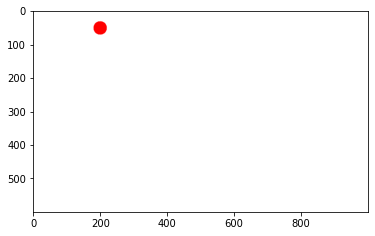

In [11]:
plt.imshow(canvas)